In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

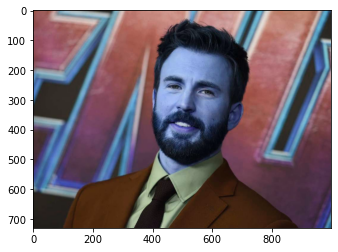

In [2]:
img = cv.imread("C://Users//anith//OneDrive//Desktop//Images//test_image.jpg")
plt.imshow(img)

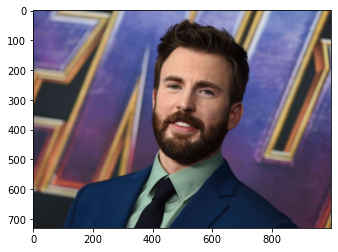

In [3]:
color = cv.cvtColor(img , cv.COLOR_BGR2RGB)
plt.imshow(color)

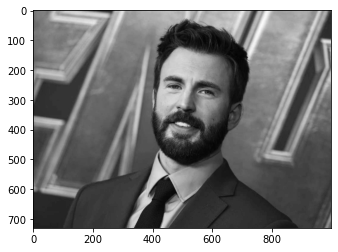

In [4]:
gray = cv.cvtColor(color , cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [5]:
face = cv.CascadeClassifier("C://Users//anith//OneDrive//Desktop//Classifiers//haarcascade_frontalface_default.xml")
eye = cv.CascadeClassifier("C://Users//anith//OneDrive//Desktop//Classifiers//haarcascade_eye.xml")

face_val = face.detectMultiScale(gray, 1.3, 5)

In [6]:
x,y,w,h = face_val[0]
x,y,w,h

(375, 144, 293, 293)

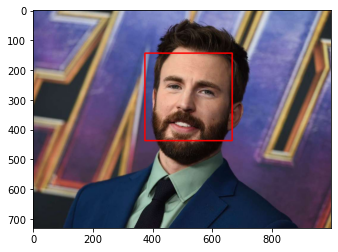

In [7]:
face_draw = cv.rectangle(color,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_draw)

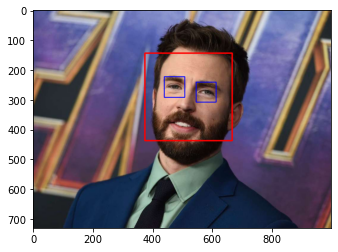

In [8]:
cv.destroyAllWindows()
for (x,y,w,h) in face_val:
    face_draw = cv.rectangle(color,(x,y),(x+w,y+h),(255,0,0),2)
    gray_face = gray[y:y+h, x:x+w]
    color_face = face_draw[y:y+h, x:x+w]
    eye_val = eye.detectMultiScale(gray_face)
    for (ex,ey,ew,eh) in eye_val:
        cv.rectangle(color_face,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        
plt.figure()
plt.imshow(face_draw,cmap='gray')

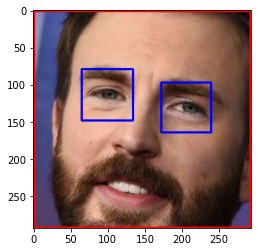

In [9]:
plt.imshow(color_face,cmap='gray')

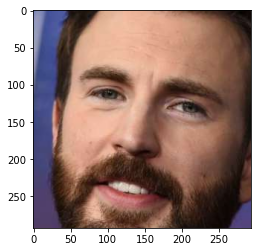

In [10]:
def cropped_img(path):
    img = cv.imread(path)
    color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(color, cv.COLOR_BGR2GRAY)
    face_val = face.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in face_val:
        gray_face = gray[y:y+h, x:x+w]
        color_face = color[y:y+h, x:x+w]
        eye_val = eye.detectMultiScale(gray_face)
        if len(eye_val)>=2:
            return color_face

plt.imshow(cropped_img("C://Users//anith//OneDrive//Desktop//Images//test_image.jpg"))
plt.savefig("C://Users//anith//OneDrive//Desktop//Images//cropped_image.png")

In [11]:
path = "C://Users//anith//OneDrive//Desktop//Images//"
path_cropped = "C://Users//anith//OneDrive//Desktop//Cropped//"

In [12]:
import os

dir = []
for i in os.scandir(path):
    if i.is_dir():
        dir.append(i.path)

In [13]:
dir

['C://Users//anith//OneDrive//Desktop//Images//allu_arjun',
 'C://Users//anith//OneDrive//Desktop//Images//al_pacino',
 'C://Users//anith//OneDrive//Desktop//Images//arnold_schwarzenegger',
 'C://Users//anith//OneDrive//Desktop//Images//brad_pitt',
 'C://Users//anith//OneDrive//Desktop//Images//bruce_lee',
 'C://Users//anith//OneDrive//Desktop//Images//bruce_willis',
 'C://Users//anith//OneDrive//Desktop//Images//cameron_diaz',
 'C://Users//anith//OneDrive//Desktop//Images//catherine_zeta_jones',
 'C://Users//anith//OneDrive//Desktop//Images//charlize_theron',
 'C://Users//anith//OneDrive//Desktop//Images//christian_bale',
 'C://Users//anith//OneDrive//Desktop//Images//chris_evans',
 'C://Users//anith//OneDrive//Desktop//Images//chris_hemsworth',
 'C://Users//anith//OneDrive//Desktop//Images//conor_mcgregor',
 'C://Users//anith//OneDrive//Desktop//Images//denzel_washington',
 'C://Users//anith//OneDrive//Desktop//Images//don_cheadle',
 'C://Users//anith//OneDrive//Desktop//Images//dway

In [14]:
import shutil

if os.path.exists(path_cropped):
    shutil.rmtree(path_cropped)
    
os.mkdir(path_cropped)

In [15]:
dir_cropped = []

for i in dir:
    name = i.split("//")[-1]
    print(name)
    count = 1
    
    for j in os.scandir(i):
        try:
            color_face = cropped_img(j.path)
            if color_face is not None:
                cropped = path_cropped + name
                if not os.path.exists(cropped):
                    os.makedirs(cropped)
                    dir_cropped.append(cropped)
                    print(f"Generating images for {name} in location: {cropped}")
            
                cropped_name = name + str(count) + ".png"
                cropped_path = cropped + "//" + cropped_name
            
                cv.imwrite(cropped_path,color_face)
                count+=1
        except:
            pass
            

allu_arjun
Generating images for allu_arjun in location: C://Users//anith//OneDrive//Desktop//Cropped//allu_arjun
al_pacino
Generating images for al_pacino in location: C://Users//anith//OneDrive//Desktop//Cropped//al_pacino
arnold_schwarzenegger
Generating images for arnold_schwarzenegger in location: C://Users//anith//OneDrive//Desktop//Cropped//arnold_schwarzenegger
brad_pitt
Generating images for brad_pitt in location: C://Users//anith//OneDrive//Desktop//Cropped//brad_pitt
bruce_lee
Generating images for bruce_lee in location: C://Users//anith//OneDrive//Desktop//Cropped//bruce_lee
bruce_willis
Generating images for bruce_willis in location: C://Users//anith//OneDrive//Desktop//Cropped//bruce_willis
cameron_diaz
Generating images for cameron_diaz in location: C://Users//anith//OneDrive//Desktop//Cropped//cameron_diaz
catherine_zeta_jones
Generating images for catherine_zeta_jones in location: C://Users//anith//OneDrive//Desktop//Cropped//catherine_zeta_jones
charlize_theron
Genera

In [ ]:
import os

cropped_path = "C://Users//anith//OneDrive//Desktop//Cropped"

for folder_name in os.listdir(cropped_path):
    folder_path = os.path.join(cropped_path, folder_name)
    
    if not os.path.isdir(folder_path):
        continue
    
    i = 1
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if not os.path.isfile(file_path):
            continue
        
        # Get the file extension
        file_extension = os.path.splitext(file_name)[1]
        
        # Create the new file name
        new_file_name = f"{folder_name.lower().replace(' ', '')}{i}{file_extension}"
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Check if the new file name already exists
        while os.path.exists(new_file_path):
            i += 1
            new_file_name = f"{folder_name.lower().replace(' ', '')}{i}{file_extension}"
            new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(file_path, new_file_path)
        
        i += 1


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict